In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Попробуем решить ML часть задачи разработки anti-fraud системы

In [4]:
GeneralDataFrame = pd.read_csv('./creditcard.csv')
GeneralDataFrame.shape

(284807, 31)

In [5]:
GeneralDataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
GeneralDataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


В нашем распоряжении есть набор данных, в котором около 300к записей транзакций по банковским картам. Судя по тому, что мы видим первым взглядом, можно говорить о том что наши данные уже стандартизированы, все поля кроме Amount. Имеем 2 метки классов 0 - NotFraud, 1 - Fraud, целевой класс, который будем пытаться предсказывать - Fraud.
Заметим еще то, что данные у нас анонимные, это связано со спецификой решаемой задачи, финансовые данные как и медицинские должны быть защещены путем анонимизации, если вы конечно не чей-то личный врач или банкир.

Как говорилось ранее в лекции, особенность задачи anti-fraud заключается в том, что скорее всего мы будем работать с несбалансированными по классам выборками. Чаще всего хороших транзакций гораздо больше чем мошеннических, потому что каждый участник процесса формирования и обработки транзакций на своей стороне пытается снизить количество фродовых транзакций, да и в принципе мошенников меньше чем нормальных людей, поэтому работаем с тем что есть.

Посмотрим, можем нам повезло и у нас классы сбалансированы:

In [7]:
Names = {0:'Not_Fraud',1:'Fraud'}
print(GeneralDataFrame.Class.value_counts().rename(index = Names))

Not_Fraud    284315
Fraud           492
Name: Class, dtype: int64


Увы, конечно же они не будут сбалансированы, ничего удивительного, причем в нашем случае расхождение в количестве ппримеров каждого класса очень сильное, в несколько порядков.

Разделим наш набор данных на предикторы и целевую перменную, которую будем пытаться предсказывать. Избавимся от столбца Time, в данном случае мы не пытаемся решить задачу прогнозирования временных рядов, поэтому информации для нас в этой переменной не так уж и много.

In [8]:
FeatureNames = GeneralDataFrame.iloc[:,1:30].columns
Target = GeneralDataFrame.iloc[:1,30:].columns
print(FeatureNames)
print(Target)

DataFeatures = GeneralDataFrame[FeatureNames]
DataTarget = GeneralDataFrame[Target]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


Мы изначально заметили дисбаланс классов, уже сходу понимаем что строить классификатор на таких данных это не очень хорошая идея, потому что мы скорее всего получим ситуацию переобучения модели под конкретный класс (под тот класс примеров которого больше). Но все же чисто в исследовательских целях обучим какой-нибудь простой алгоритм типа логистической регрессии, просто для понимания того, о чего будем отталкиваться в плане точности классификации.

In [9]:
#разбиваем генеральную выборку на тренировочную - 70% и тестовую - 30%
Splitter = StratifiedShuffleSplit(n_splits = 1,test_size = 0.3,random_state = 40)
for train_indices,test_indices in Splitter.split(DataFeatures,DataTarget):
    XTrain,YTrain = DataFeatures.iloc[train_indices],DataTarget.iloc[train_indices]
    XTest,YTest = DataFeatures.iloc[test_indices],DataTarget.iloc[test_indices]

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))

x_test:199364  y_test:199364
x_train:85443  y_train:85443


In [10]:
#проверим что там у нас с балансами классов
def CheckClassesBalance(Data):
    Fraud_Train = []
    NotFraud_Train = []
    
    for i in Data:
        if i == 1:
            Fraud_Train.append(i)
        else:
            NotFraud_Train.append(i)
        
    print('Number of training elements fraud class: ' + str(len(Fraud_Train)))
    print('Number of training elements not fraud class: ' + str(len(NotFraud_Train)))

Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 199020
Number of training elements fraud class: 148
Number of training elements not fraud class: 85295


In [11]:
#либо еще такой вариант есть, кому как нравится, результат разбиения на выборки будет одинаковый
XTrain,XTest,YTrain,YTest = train_test_split(DataFeatures,DataTarget,stratify = DataTarget,
                                             test_size = 0.3,
                                             random_state = 40)

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))

x_test:199364  y_test:199364
x_train:85443  y_train:85443


In [12]:
Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 199020
Number of training elements fraud class: 148
Number of training elements not fraud class: 85295


In [13]:
#обучим логистическую регрессию на тренировочной выборке, полученной из генерального набора данных, без балансировки классов
Model_LogReg = LogisticRegression()
Model_LogReg.fit(XTrain,YTrain.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

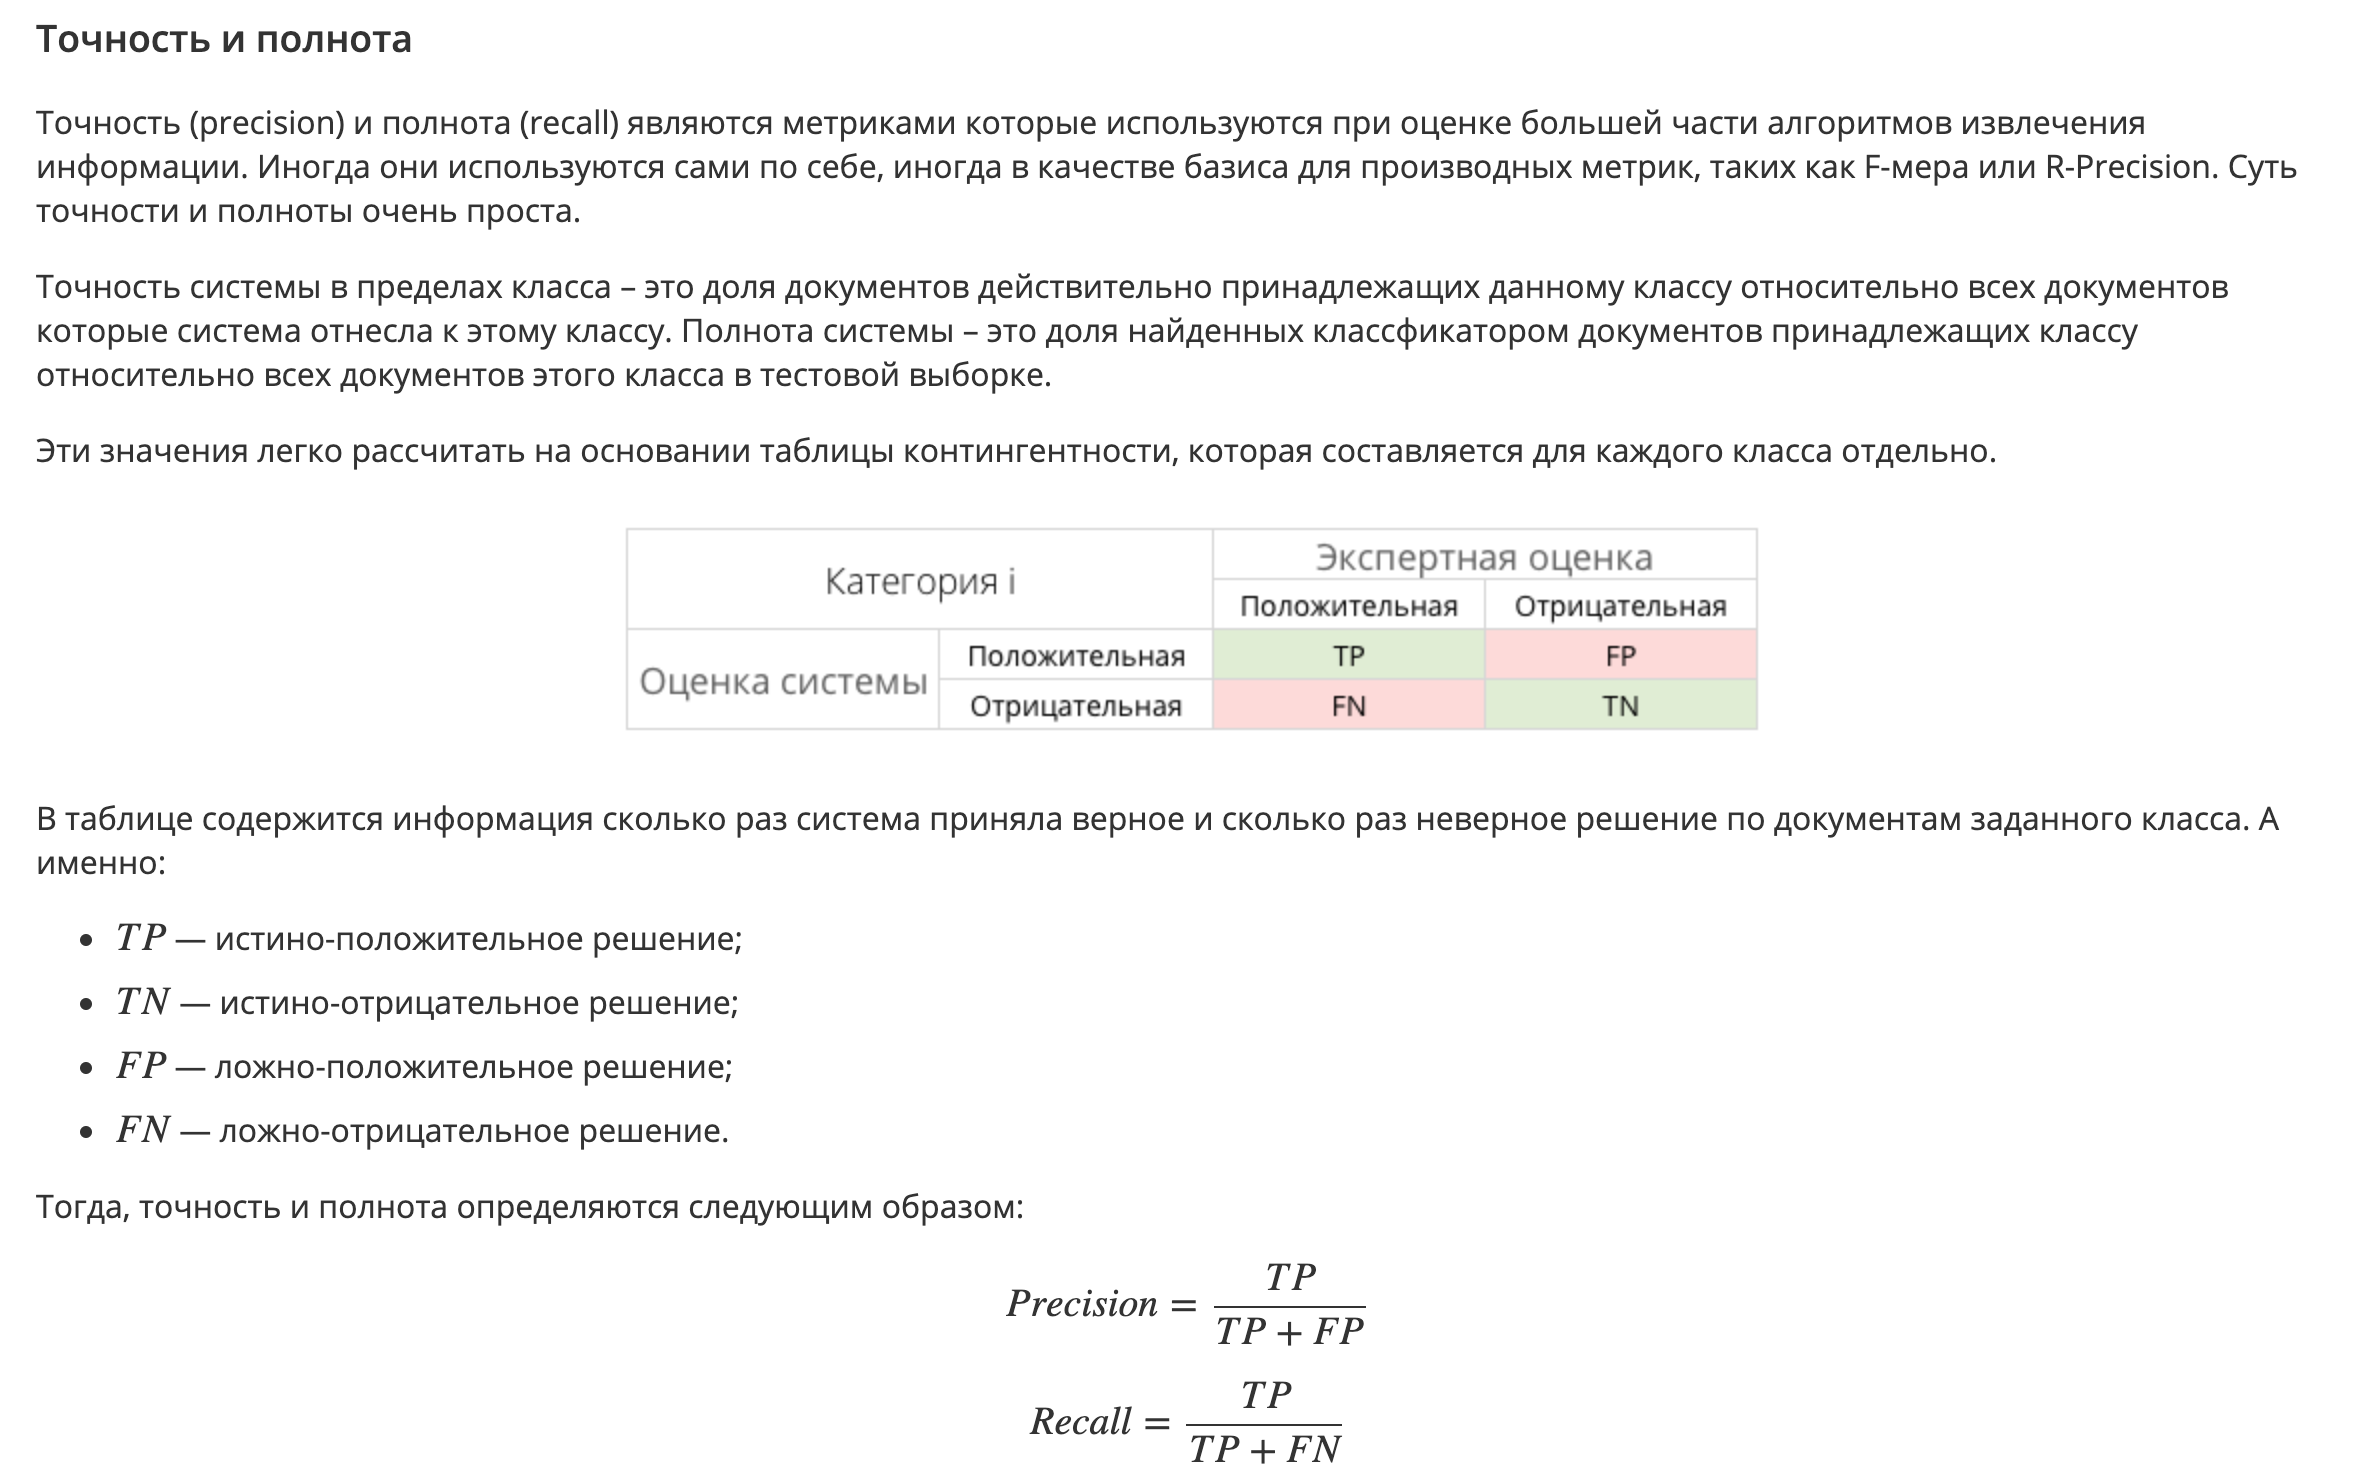

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.55      0.67       148

    accuracy                           1.00     85443
   macro avg       0.94      0.77      0.84     85443
weighted avg       1.00      1.00      1.00     85443



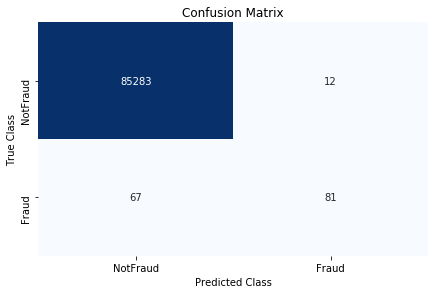

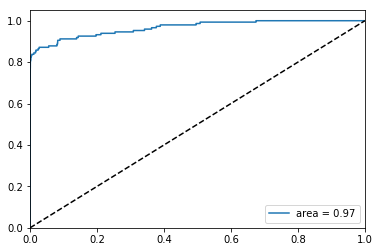

In [14]:
#посмотрим что там у нас получилось с классификатором на тестовой выборке
Pred = Model_LogReg.predict(XTest)
print(classification_report(YTest,Pred))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_LogReg.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc = 'lower right')
plt.show()

В итоге как и предполагалось мы имеем классическую ситуацию, когда пытаемся обучить классификатор на выборке с несбалансированными классами, логично что классификатор будет лучше предсказывать тот класс, примеров которого он видел большее количество.

Перейдем к решению подзадачи балансировки классов в генеральном наборе данных.
Есть несколько основных подходов к решению проблемы несбалансированности классов:
1. Oversampling — SMOTE
2. Undersampling — RandomUnderSampler
3. Combined Class Methods — SMOTE + ENN

Каждый подход мы будем тестировать путем обучения логистической регрессии, чтобы сравнивать точность классификации

In [16]:
#Oбернем повторяющийся код деления на тренировчную и тестовую выборку с последующим обучением лог.регрсии в отдельную функцию
#мы же не хотим говнокодить, правильно?))))
def TestClassBalanceMethod(XTrain_Balance,YTrain_Balance,XTest,YTest):
    
    #обучение модели
    Model_LogReg = LogisticRegression()
    Model_LogReg.fit(XTrain_Balance,YTrain_Balance)
    
    #предсказание классов на тестовой выборке
    pred = Model_LogReg.predict(XTest)
    print(classification_report(YTest,pred))
    
    #визуализация результатов работы классификатора
    class_names = ['NotFraud','Fraud']
    Matrix = confusion_matrix(YTest,pred)
    DFCM = pd.DataFrame(Matrix,index =  class_names,columns = class_names)
    sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
    plt.title("Confusion Matrix"),plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()
    
    PredProbaClass = Model_LogReg.predict_proba(XTest)[:,1]
    fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
    plt.plot([0, 1],[0, 1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.legend(loc = 'lower right')
    plt.show()

1. Oversampling — SMOTE
один из популярных способов справиться с несбалансированными данными - избыточная выборка. Избыточная выборка означает искусственное создание наблюдений в нашем наборе данных, принадлежащих к классу, который недостаточно представлен. Одной из распространенных техник является SMOTE - методика синтетического пересчета меньшинств. На высоком уровне SMOTE создает синтетические наблюдения для класса меньшинства (в данном случае, мошеннических транзакций). На более низком уровне SMOTE выполняет следующие шаги:Нахождение k-ближайших соседей для наблюдений класса меньшинства (поиск похожих наблюдений, случайно выбирая одного из k-ближайших соседей и используя его для создания аналогичных, но случайно настроенных новых наблюдений)
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [17]:
SMT = SMOTE(random_state = 40)
XTrain_SMOTE,YTrain_SMOTE = SMT.fit_sample(XTrain,YTrain)

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.86      0.18       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443



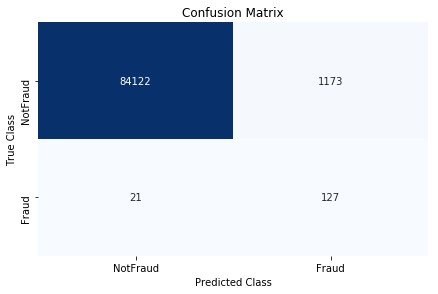

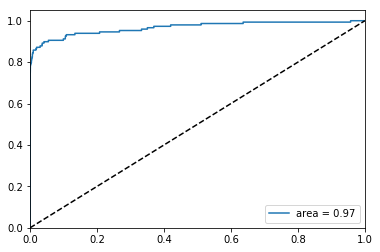

In [18]:
TestClassBalanceMethod(XTrain_SMOTE,YTrain_SMOTE,XTest,YTest)

Ну вот это уже совершенно другое дело, балансировка классов значительно улучшило работу нашего классификатора в отношнии целевого класса Fraud, но мы же исследователи, два других тоже протестируем, чтобы точно быть уверенными в правильности нашего выбора

2. Undersampling — RandomUnderSampler
Оптимизация работает путем выборки доминирующего класса, чтобы уменьшить количество выборок.Один из простых способов недостаточной выборки - это случайный выбор нескольких выборок из класса, который перепредставлен.Оптимизация работает путем выборки доминирующего класса, чтобы уменьшить количество выборок. Один из простых способов недостаточной выборки - это случайный выбор нескольких выборок из класса, который перепредставлен.Класс RandomUnderSampler из библиотеки imblearn - это быстрый и простой способ сбалансировать данные путем случайного выбора подмножества данных для целевых классов. Он работает, выполняя кластеризацию k-средних для большинства классов 
и удаляя точки данных из центроидов высокой плотности. https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html

In [19]:
RUS = RandomUnderSampler(random_state = 40)
XTrain_RUS,YTrain_RUS = RUS.fit_sample(XTrain,YTrain)

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.86      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



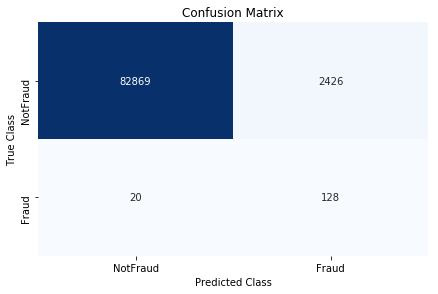

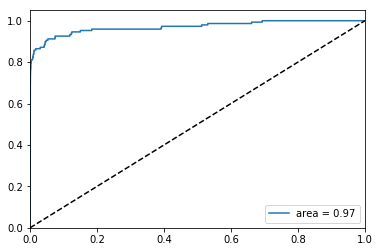

In [20]:
TestClassBalanceMethod(XTrain_RUS,YTrain_RUS,XTest,YTest)

3. Combined Class Methods — SMOTE + ENN. 
SMOTE может генерировать зашумленные выборки путем интерполяции новых точек между краевыми выбросами и входами. Эта проблема может быть решена путем очистки полученного пространства, полученного после передискретизации. В связи с этим мы будем использовать SMOTE вместе с отредактированными ближайшими соседями (ENN). Здесь ENN используется в качестве метода очистки после избыточного отбора проб SMOTE для получения более чистого пространства. Это легко достижимо с помощью класса SMOTEENN imblearn. https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html

In [21]:
#данный подход сложнее чем два предыдущих, поэтому фититься будет дольше
SME = SMOTEENN(random_state = 40)
XTrain_SME,YTrain_SME = SME.fit_sample(XTrain,YTrain)

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.10      0.86      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443



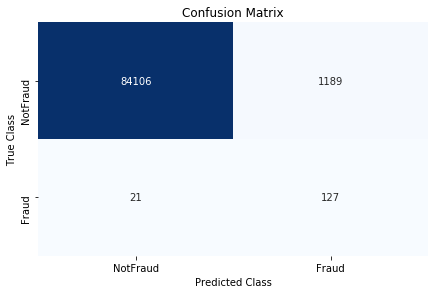

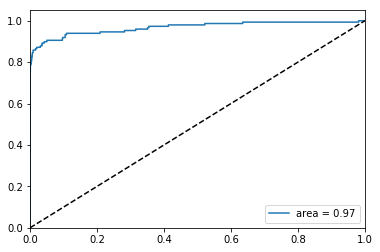

In [22]:
TestClassBalanceMethod(XTrain_SME,YTrain_SME,XTest,YTest)

# Обучение классификатора на ансамблевом алгоритме случайного леса деревьев решений

Как и в случае использования алгоритма логистической регрессии для разработки бинарного классификатора карточных транзакций, попробуем обучиться на несбалансированных данных с помощью алгоритма случайного леса на минималках. 

In [23]:
#провалидируем классификатор с помощью кросс-валидации на 5 фолдах с расчетом среднего значения точности
SKF = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 40)
RFC = RandomForestClassifier()
Results = cross_val_score(RFC,XTrain,YTrain,cv = SKF)
print("CV accuracy score: {:.2f}%".format(Results.mean()*100))

C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anton\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

CV accuracy score: 99.95%


In [24]:
#обучаем на полной тренировочной выборке
Model_RFC_RandSeed = np.random.RandomState(40)
Model_RFC = RandomForestClassifier(random_state = Model_RFC_RandSeed)
Model_RFC.fit(XTrain,YTrain)

C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False,
                       random_state=<mtrand.RandomState object at 0x0000015200E88048>,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



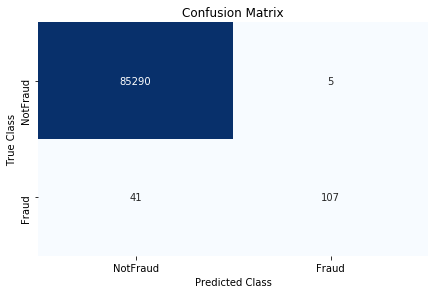

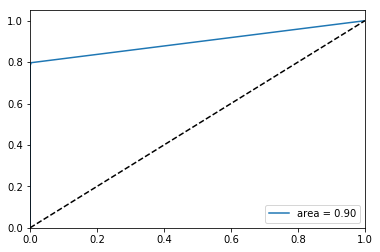

In [25]:
#проверим работоспособность нашего классификатора на тестовой выборке
Pred = Model_RFC.predict(XTest)
print(classification_report(YTest,Pred))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_RFC.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc = 'lower right')
plt.show()

В логистической регрессии (и её обобщениях – нейросетях) баланс классов сильно влияет на свободный член, но очень слабо – на коэффициенты наклона. Действительно, предсказанное отношение шансов  из бинарной логистической регрессии меняется на константу при изменении баланса классов, и этот эффект уходит в свободный член.


В деревьях решений (и их обобщениях – случайном лесе и градиентном бустинге), дисбаланс классов влияет на меры неоднородности (impurity) листьев, но это влияние примерно пропорционально для всех кандидатов в очередную разбивку (split), и потому обычно не особо влияет на выбор разбивок.


С другой стороны, на не-вероятностные модели типа SVM дисбаланс классов может серьёзно влиять. SVM строит обучающую гиперплоскость так, что примерно одно и то же число положительных и отрицательных примеров находится на разделяющей полосе или на неправильной её стороне. Поэтому изменение баланса классов может повлиять это число, а значит, и на положение границы.


Когда мы используем вероятностные модели для бинарной классификации, всё ОК: во время обучения, модели не сильно зависят от баланса классов, а при тестировании мы можем использовать метрики, нечувствительные к балансу классов. Такие метрики (например, ROC AUC) зависят от предсказанных вероятностей классов, а не от «жёсткой» дискретной классификации.

Источник: https://habr.com/ru/post/349078/

To-do:
Мы разработали классификатор, основанный на алгоритме случайнго леса решающих деревьев, хоть он и не так чувствителен к дисбалансу классов как логистическая регрессия или нейронная сеть (по причинам описанным выше), точность его работы можно попробовать увеличить. Мы использовали случайный лес на минималках, можно попробовать поиграться с гипер-параметрами алгоритма для улучшения его работы.
Увеличение значений гипер параметров (количество деревьев,глубина... в документации sklearn можно посмотреть полный перечень https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ведет к усложнению архитектуры модели, что в свою очередь может привести к переобучению, для этого было бы неплохо провести процесс регуляризации и подбора оптимальных гипер-параметров, данный процесс хорошо и наглядно описан в одном из занятий курса ODS https://habr.com/ru/company/ods/blog/324402/.